# Pandas

In [1]:
import pandas as pd
import numpy as np
import warnings

pd.options.display.max_rows = 50
pd.options.display.max_columns = 10

warnings.filterwarnings("ignore")

# Faker dataset

In [2]:
# !pip install Faker
import random
from faker import Faker
fake = Faker()

Faker.seed(1)
fake.unique.clear()

customers_df_sample_size = 10
sellers_df_sample_size = 5
orders_df_sample_size = 20

customers_df = (
    pd.DataFrame(data = {'id': [fake.unique.random_int() for i in range(customers_df_sample_size)],
                         'name': [fake.name() for i in range(customers_df_sample_size)],
                         'city': [fake.city() for i in range(customers_df_sample_size)],
                         'email': [fake.email() for i in range(customers_df_sample_size)]})
    .sort_values('id')
    .reset_index(drop = True)
)

sellers_df = (
    pd.DataFrame(data = {'id': [fake.unique.random_int() for i in range(sellers_df_sample_size)],
                         'company': [fake.company() for i in range(sellers_df_sample_size)],
                         'city': [fake.city() for i in range(sellers_df_sample_size)]})
    .sort_values('id')
    .reset_index(drop = True)
)

orders_df = (
    pd.DataFrame(data = {'id': [fake.unique.random_int() for i in range(orders_df_sample_size)],
                         'customer_id': customers_df['id'].sample(orders_df_sample_size, replace = True, random_state = 0).reset_index(drop = True),
                         'seller_id': sellers_df['id'].sample(orders_df_sample_size, replace = True, random_state = 0).reset_index(drop = True),
                         'amount': [fake.random_number(digits = 3) * 0.1 for i in range(orders_df_sample_size)],
                         'tax':[fake.random_number(digits = 1) * 0.1 for i in range(orders_df_sample_size)],
                         'create_timestamp': [fake.date_time_this_year() for i in range(orders_df_sample_size)],
                         'status': random.choices(['Shipped','Delivered','Processing'], k = orders_df_sample_size),
                         'promotion': random.choices([True, False], k = orders_df_sample_size),
                         'notes': [fake.text(max_nb_chars = 20) for i in range(orders_df_sample_size)]})
    .sort_values('id')
    .reset_index(drop = True)
)

## customers_df

In [3]:
customers_df

,id,name,city,email
0,1033,Nathan Perez,Romeroborough,tinatownsend@example.net
1,1931,Joshua Crosby,Chapmanton,stephen48@example.net
2,2201,Allen Houston,Lake Victoria,twilliams@example.net
3,3439,Kristie May,Tracytown,ireed@example.net
4,4179,Stephanie Johnson,Justinfort,richardcooper@example.net
5,6219,Dylan Smith,Port Frankfurt,shelleygutierrez@example.com
6,7364,Daniel Kim,Ortegastad,aprilhoffman@example.com
7,7737,David Hall II,Christopherhaven,castillomichael@example.net
8,8117,Daniel Henderson,Sanchezfurt,reyesmelody@example.net
9,9325,Philip Smith,Davidmouth,kholland@example.net


## sellers_df

In [4]:
sellers_df

,id,company,city
0,458,Wright-Rodriguez,Wilsonport
1,3761,"Lopez, Roberts and Jackson",Cooperborough
2,5425,"Thompson, Silva and Callahan",Alisonburgh
3,7506,"Robles, Velasquez and Scott",Deborahport
4,9828,"Jones, Parrish and Chavez",Parkfort


## orders_df

In [5]:
orders_df

,id,customer_id,seller_id,amount,tax,create_timestamp,status,promotion,notes
0,292,4179,458,32.8,0.4,2021-06-18 03:23:15,Delivered,False,Easy attention.
1,341,6219,5425,58.9,0.6,2021-08-11 16:18:50,Delivered,True,Guy who us third.
2,578,8117,5425,43.6,0.8,2021-07-11 05:02:29,Shipped,True,Different executive.
3,1781,1033,458,22.8,0.4,2021-01-15 12:48:40,Shipped,False,We father affect.
4,2399,7364,9828,64.6,0.0,2021-03-17 09:19:00,Processing,False,Compare whether.
5,2625,8117,3761,6.0,0.0,2021-02-10 13:18:15,Shipped,True,Go plan move.
6,3425,7737,7506,3.1,0.4,2021-05-15 17:37:48,Delivered,True,Group laugh.
7,3614,8117,3761,21.7,0.2,2021-07-14 02:28:22,Processing,True,Ok speech body full.
8,3692,2201,9828,82.2,0.9,2021-09-19 19:33:41,Processing,False,Nor memory special.
9,4152,3439,7506,53.6,0.1,2021-05-27 18:55:29,Processing,False,Deep toward.


# 1. Data load and write

In [6]:
%%script echo skipping 

pd.read_csv('', 
            header = None, 
            names = [''], 
            index_col = [''], 
            skiprows = [], 
            na_values = [''])

pd.DataFrame([1]).to_csv('', 
                         index = False, 
                         header = False)

skipping


In [7]:
%%script echo skipping 

with open('') as f:
    # do something

skipping


In [8]:
%%script echo skipping 

pd.read_json('')
pd.DataFrame([1]).to_json()

skipping


In [9]:
%%script echo skipping 

pd.read_html('')
pd.DataFrame([1]).to_html()

skipping


In [10]:
%%script echo skipping 

pd.read_pickle('')
pd.DataFrame([1]).to_pickle()

skipping


In [11]:
%%script echo skipping 

pd.HDFStore('')
pd.read_hdf()
pd.DataFrame([1]).to_hdf()

skipping


In [12]:
%%script echo skipping 

pd.ExcelFile()
pd.read_excel()
pd.DataFrame([1]).to_excel()

skipping


In [13]:
%%script echo skipping 

pd.read_sql('',con)

skipping


In [14]:
%%script echo skipping 

# PyTables 
import tables as tb
tb.open_file()

skipping


In [15]:
%%script echo skipping 

import tstables as tstab 

skipping


# 2. Series

In [16]:
ser = pd.Series([1, 2, 3, 4, 5],
               index = ['a','b','c','d','e'])
ser

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [433]:
ser = pd.Series({'a':1, 'b':2, 'c':3, 'd':4, 'e':5})
ser

a    1
b    2
c    3
d    4
e    5
dtype: int64

## type

In [17]:
type(ser)

pandas.core.series.Series

## values

In [18]:
ser.values

array([1, 2, 3, 4, 5])

## index

In [19]:
ser.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## name

In [29]:
ser.name

In [30]:
ser1.index.name

## dtype

In [31]:
ser.dtype

dtype('int64')

# 3. DataFrame

In [32]:
sellers_df

,id,company,city
0,458,Wright-Rodriguez,Wilsonport
1,3761,"Lopez, Roberts and Jackson",Cooperborough
2,5425,"Thompson, Silva and Callahan",Alisonburgh
3,7506,"Robles, Velasquez and Scott",Deborahport
4,9828,"Jones, Parrish and Chavez",Parkfort


## type

In [33]:
type(sellers_df)

pandas.core.frame.DataFrame

## index

In [34]:
sellers_df.index

RangeIndex(start=0, stop=5, step=1)

## columns

In [35]:
sellers_df.columns

Index(['id', 'company', 'city'], dtype='object')

## values

In [36]:
sellers_df.values

array([[458, 'Wright-Rodriguez', 'Wilsonport'],
       [3761, 'Lopez, Roberts and Jackson', 'Cooperborough'],
       [5425, 'Thompson, Silva and Callahan', 'Alisonburgh'],
       [7506, 'Robles, Velasquez and Scott', 'Deborahport'],
       [9828, 'Jones, Parrish and Chavez', 'Parkfort']], dtype=object)

## T

In [37]:
sellers_df.T

,0,1,2,3,4
id,458,3761,5425,7506,9828
company,Wright-Rodriguez,"Lopez, Roberts and Jackson","Thompson, Silva and Callahan","Robles, Velasquez and Scott","Jones, Parrish and Chavez"
city,Wilsonport,Cooperborough,Alisonburgh,Deborahport,Parkfort


In [38]:
sellers_df.T.index

Index(['id', 'company', 'city'], dtype='object')

In [39]:
sellers_df.T.columns

RangeIndex(start=0, stop=5, step=1)

In [40]:
sellers_df.T.values

array([[458, 3761, 5425, 7506, 9828],
       ['Wright-Rodriguez', 'Lopez, Roberts and Jackson',
        'Thompson, Silva and Callahan', 'Robles, Velasquez and Scott',
        'Jones, Parrish and Chavez'],
       ['Wilsonport', 'Cooperborough', 'Alisonburgh', 'Deborahport',
        'Parkfort']], dtype=object)

## name (index, column)

In [41]:
sellers_df.index.name = 'rows'
sellers_df.columns.name = 'cols'
sellers_df

cols,id,company,city
rows,,,
0,458,Wright-Rodriguez,Wilsonport
1,3761,"Lopez, Roberts and Jackson",Cooperborough
2,5425,"Thompson, Silva and Callahan",Alisonburgh
3,7506,"Robles, Velasquez and Scott",Deborahport
4,9828,"Jones, Parrish and Chavez",Parkfort


## shape

In [42]:
sellers_df.values.shape

(5, 3)

# 4. Essentials

## Index

In [43]:
ser = pd.Series(range(3), 
                index = ['a','b','c'])
ser

a    0
b    1
c    2
dtype: int64

In [44]:
ser.index

Index(['a', 'b', 'c'], dtype='object')

In [45]:
pd.Index(np.arange(3))

Int64Index([0, 1, 2], dtype='int64')

In [46]:
pd.Index(['a','a','a','b','c'])

Index(['a', 'a', 'a', 'b', 'c'], dtype='object')

## Reindex

In [47]:
ser = pd.Series([1,2,3,4,5], 
                index = ['a','b','c','d','e'])
ser

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [48]:
ser.reindex(['e','d','c','b','a'])

e    5
d    4
c    3
b    2
a    1
dtype: int64

In [49]:
ser = pd.Series(['a','b','c'], 
                index = [0,2,4])
ser

0    a
2    b
4    c
dtype: object

In [50]:
ser.reindex(range(6))

0      a
1    NaN
2      b
3    NaN
4      c
5    NaN
dtype: object

In [51]:
ser.reindex(range(6), 
            method = 'ffill')

0    a
1    a
2    b
3    b
4    c
5    c
dtype: object

In [52]:
sellers_df

cols,id,company,city
rows,,,
0,458,Wright-Rodriguez,Wilsonport
1,3761,"Lopez, Roberts and Jackson",Cooperborough
2,5425,"Thompson, Silva and Callahan",Alisonburgh
3,7506,"Robles, Velasquez and Scott",Deborahport
4,9828,"Jones, Parrish and Chavez",Parkfort


In [53]:
sellers_df.reindex(index = [4,3,2,1,0],
                   columns = ['company','city','id'])

cols,company,city,id
rows,,,
4,"Jones, Parrish and Chavez",Parkfort,9828
3,"Robles, Velasquez and Scott",Deborahport,7506
2,"Thompson, Silva and Callahan",Alisonburgh,5425
1,"Lopez, Roberts and Jackson",Cooperborough,3761
0,Wright-Rodriguez,Wilsonport,458


## Duplicate index

In [54]:
ser = pd.Series(range(5), 
                index = ['a','a','b','b','c'])
ser

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [55]:
ser.index.is_unique

False

In [56]:
ser['a']

a    0
a    1
dtype: int64

In [57]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                  index = ['a','a','b','b'])
df

,0,1,2
a,0,1,2
a,3,4,5
b,6,7,8
b,9,10,11


In [58]:
df.loc['b']

,0,1,2
b,6,7,8
b,9,10,11


## Hierarchical index and level

In [59]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                  index = [['a','a','b','b'],
                           ['one','two','one','two']],
                  columns = [['A','A','B'],
                             ['C1','B1','A1']])
df

A       B
      C1  B1  A1
a one  0   1   2
  two  3   4   5
b one  6   7   8
  two  9  10  11

In [60]:
df.index

MultiIndex([('a', 'one'),
            ('a', 'two'),
            ('b', 'one'),
            ('b', 'two')],
           )

In [61]:
df.columns

MultiIndex([('A', 'C1'),
            ('A', 'B1'),
            ('B', 'A1')],
           )

In [62]:
df.loc['a','two']

A  C1    3
   B1    4
B  A1    5
Name: (a, two), dtype: int64

In [63]:
df.loc[pd.IndexSlice[:,'two'],['A','B']]

A       B
      C1  B1  A1
a two  3   4   5
b two  9  10  11

In [64]:
df.xs('two', level = 1)

A       B
  C1  B1  A1
a  3   4   5
b  9  10  11

In [65]:
df.index.names = ['index1','index2']

In [66]:
df.columns.names = ['column1','column2']

In [67]:
pd.MultiIndex.from_arrays([['A','A','B'],
                           ['a','b','a']], names = ['one','two'])

MultiIndex([('A', 'a'),
            ('A', 'b'),
            ('B', 'a')],
           names=['one', 'two'])

In [68]:
df.index.levels

FrozenList([['a', 'b'], ['one', 'two']])

In [69]:
df.columns.levels

FrozenList([['A', 'B'], ['A1', 'B1', 'C1']])

In [70]:
df

column1        A       B
column2       C1  B1  A1
index1 index2           
a      one     0   1   2
       two     3   4   5
b      one     6   7   8
       two     9  10  11

In [71]:
df.swaplevel('index2','index1')

column1        A       B
column2       C1  B1  A1
index2 index1           
one    a       0   1   2
two    a       3   4   5
one    b       6   7   8
two    b       9  10  11

In [72]:
df.sort_index(axis = 0, level = 0)

column1        A       B
column2       C1  B1  A1
index1 index2           
a      one     0   1   2
       two     3   4   5
b      one     6   7   8
       two     9  10  11

In [73]:
df.sort_index(axis = 1, level = 1)

column1         B   A   
column2        A1  B1 C1
index1 index2           
a      one      2   1  0
       two      5   4  3
b      one      8   7  6
       two     11  10  9

In [74]:
df.sum(axis = 0, level = 0)

column1   A       B
column2  C1  B1  A1
index1             
a         3   5   7
b        15  17  19

In [75]:
df.sum(axis = 0, level = 'index1')

column1   A       B
column2  C1  B1  A1
index1             
a         3   5   7
b        15  17  19

In [76]:
df = pd.DataFrame({'a':range(7), 
                   'b':range(7,0,-1),
                   'c':['one','one','one','two','two','two','two'],
                   'd':[0,1,2,0,1,2,3]})
df

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [77]:
df.set_index(['c','d'])

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

## Reset index

In [78]:
df.set_index(['c','d']).reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Assign

In [79]:
df = pd.DataFrame(np.arange(4).reshape((2,2)),
                  index = ['a', 'b'],
                  columns = ['A','B'])
df

,A,B
a,0,1
b,2,3


In [80]:
df.assign(E = np.arange(2))

,A,B,E
a,0,1,0
b,2,3,1


In [81]:
df['E'] = np.arange(2)
df

,A,B,E
a,0,1,0
b,2,3,1


## Drop

In [82]:
df = pd.DataFrame(np.arange(9).reshape((3,3)),
                  index = ['a', 'b','c'],
                  columns = ['A','B','C'])
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8


In [83]:
df.drop(['a'], axis = 0)

,A,B,C
b,3,4,5
c,6,7,8


In [84]:
df.drop(['A'], axis = 1)

,B,C
a,1,2
b,4,5
c,7,8


## Select and filter

In [85]:
ser = pd.Series(np.arange(4), 
                index = ['a','b','c','d'])
ser

a    0
b    1
c    2
d    3
dtype: int64

In [86]:
ser['b']

1

In [87]:
ser[1]

1

In [88]:
ser[['a','b']]

a    0
b    1
dtype: int64

In [89]:
ser[ser < 2]

a    0
b    1
dtype: int64

In [90]:
df = pd.DataFrame(np.arange(16).reshape((4,4)),
                  index = ['a','b','c','d'],
                  columns = ['A','B','C','D'])
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [91]:
df.A

a     0
b     4
c     8
d    12
Name: A, dtype: int64

In [92]:
df[['A','D']]

,A,D
a,0,3
b,4,7
c,8,11
d,12,15


In [93]:
df[:2]

,A,B,C,D
a,0,1,2,3
b,4,5,6,7


In [94]:
df[df['C'] > 5]

,A,B,C,D
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [95]:
df.iloc[[2,1],[3,0,1]]

,D,A,B
c,11,8,9
b,7,4,5


In [96]:
df.loc[['c','b'],['D','A','B']]

,D,A,B
c,11,8,9
b,7,4,5


In [97]:
df.loc[:,['D','A']]

,D,A
a,3,0
b,7,4
c,11,8
d,15,12


## Arithmetic

In [98]:
ser1 = pd.Series([1,2,3,4,5], index = ['a','b','c','d','e'])
ser2 = pd.Series([5,4,3,2,1], index = ['b','d','e','f','g'])

In [99]:
ser1 + ser2

a    NaN
b    7.0
c    NaN
d    8.0
e    8.0
f    NaN
g    NaN
dtype: float64

In [100]:
df1 = pd.DataFrame(np.arange(9).reshape((3,3)),
                   columns = ['A','B','C'],
                   index = ['a','c','d'])
df2 = pd.DataFrame(np.arange(12).reshape((4,3)),
                   columns = ['C','B','E'],
                   index = ['a','e','f','c'])

In [101]:
df1 + df2

,A,B,C,E
a,NaN,2.0,2.0,NaN
c,NaN,14.0,14.0,NaN
d,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN
f,NaN,NaN,NaN,NaN


In [102]:
df1.add(df2, fill_value = 0)

,A,B,C,E
a,0.0,2.0,2.0,2.0
c,3.0,14.0,14.0,11.0
d,6.0,7.0,8.0,NaN
e,NaN,4.0,3.0,5.0
f,NaN,7.0,6.0,8.0


In [103]:
df1.rdiv(1)

,A,B,C
a,inf,1.000000,0.500
c,0.333333,0.250000,0.200
d,0.166667,0.142857,0.125


In [104]:
df = pd.DataFrame(np.arange(12).reshape((4,3)),
                  columns = ['A','B','C'],
                  index = ['a','b','c','d'])
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [105]:
ser = df.iloc[0]
ser

A    0
B    1
C    2
Name: a, dtype: int64

In [106]:
df - ser

,A,B,C
a,0,0,0
b,3,3,3
c,6,6,6
d,9,9,9


## Apply and map functions

In [107]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                  columns = ['A','B','C'],
                  index = ['a','b','c','d'])
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [108]:
np.sqrt(df)

,A,B,C
a,0.000000,1.000000,1.414214
b,1.732051,2.000000,2.236068
c,2.449490,2.645751,2.828427
d,3.000000,3.162278,3.316625


In [109]:
df.apply(lambda x: x.max() - x.min(), axis = 0)

A    9
B    9
C    9
dtype: int64

In [110]:
df.apply(lambda x: x.max() - x.min(), axis = 1)

a    2
b    2
c    2
d    2
dtype: int64

In [111]:
df.applymap(lambda x: '%.2f' % x)

,A,B,C
a,0.00,1.00,2.00
b,3.00,4.00,5.00
c,6.00,7.00,8.00
d,9.00,10.00,11.00


In [112]:
df.applymap(lambda x: x + 1)

,A,B,C
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12


In [113]:
df['A'].map(lambda x: x + 1)

a     1
b     4
c     7
d    10
Name: A, dtype: int64

## Sort and rank

In [114]:
ser = pd.Series([3,2,4,1], index = ['d','a','b','c'])
ser

d    3
a    2
b    4
c    1
dtype: int64

In [115]:
ser.sort_index()

a    2
b    4
c    1
d    3
dtype: int64

In [116]:
ser.sort_values()

c    1
a    2
d    3
b    4
dtype: int64

In [117]:
df = pd.DataFrame(np.arange(8).reshape(2,4),
                  index = ['B','A'],
                  columns = ['d','a','b','c'])
df

,d,a,b,c
B,0,1,2,3
A,4,5,6,7


In [118]:
df.sort_index(axis = 0, ascending = True)

,d,a,b,c
A,4,5,6,7
B,0,1,2,3


In [119]:
df.sort_values(axis = 0, by = 'b')

,d,a,b,c
B,0,1,2,3
A,4,5,6,7


In [120]:
df.rank(axis = 1, method = 'max', ascending = False)

,d,a,b,c
B,4.0,3.0,2.0,1.0
A,4.0,3.0,2.0,1.0


## Data type

In [121]:
orders_df.dtypes

id                           int64
customer_id                  int64
seller_id                    int64
amount                     float64
tax                        float64
create_timestamp    datetime64[ns]
status                      object
promotion                     bool
notes                       object
dtype: object

In [122]:
orders_df.convert_dtypes().dtypes

id                           Int64
customer_id                  Int64
seller_id                    Int64
amount                     Float64
tax                        Float64
create_timestamp    datetime64[ns]
status                      string
promotion                  boolean
notes                       string
dtype: object

# 5. Summarize

## pandas-profiling

In [123]:
import seaborn as sns
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [124]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Statistics

In [125]:
df = pd.DataFrame([[1.4, np.nan],[7.1, -4.5],
                  [np.nan, np.nan],[0.75, -1.3]],
                  index = ['a','b','c','d'],
                  columns = ['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 96.0+ bytes


In [127]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [128]:
df.count(axis = 0)

one    3
two    2
dtype: int64

In [129]:
df.sum(axis = 0)

one    9.25
two   -5.80
dtype: float64

In [130]:
df.mean(axis = 1, skipna = True)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [131]:
df.idxmax()

one    b
two    d
dtype: object

In [132]:
df.cumsum(axis = 0)

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [133]:
df.sum().nlargest(5)

one    9.25
two   -5.80
dtype: float64

## Correlation and covariance

In [134]:
df = pd.DataFrame(np.random.randn(32).reshape(8,4),
                  columns = list('ABCD'),
                  index = list('abcdefgh'))
df

,A,B,C,D
a,1.229135,0.517423,-1.106437,1.955867
b,2.112121,0.182921,-0.181086,-0.504443
c,0.713133,-0.243844,-0.401188,0.137251
d,0.642547,-1.996632,-0.437405,0.468792
e,0.450581,-0.617453,-0.957278,-0.807838
f,-1.126586,1.328777,2.358646,-1.026754
g,-0.522519,-0.294395,-1.429731,0.344045
h,-1.108190,0.226138,1.474358,-0.157346


In [135]:
df['A'].corr(df['B'])

-0.2636510912113586

In [136]:
df.corr()

,A,B,C,D
A,1.000000,-0.263651,-0.574396,0.320311
B,-0.263651,1.000000,0.533162,-0.158795
C,-0.574396,0.533162,1.000000,-0.538205
D,0.320311,-0.158795,-0.538205,1.000000


In [137]:
df.cov()

,A,B,C,D
A,1.307491,-0.291206,-0.868820,0.343234
B,-0.291206,0.933043,0.681255,-0.143743
C,-0.868820,0.681255,1.749844,-0.667184
D,0.343234,-0.143743,-0.667184,0.878209


In [138]:
df.corrwith(df['A'])

A    1.000000
B   -0.263651
C   -0.574396
D    0.320311
dtype: float64

## Values and counts

In [139]:
ser = pd.Series(['c','a','d','a','a','b','b','c','c'])
ser

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [140]:
ser.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [141]:
ser.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [142]:
ser.isin(['b','c'])

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [143]:
ser[ser.isin(['b','c'])]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [144]:
df = pd.DataFrame({'A':[1,3,4,3,4],
                   'B':[2,3,1,2,3],
                   'C':[1,5,2,4,4]})
df

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [145]:
df.apply(pd.value_counts, axis = 0).fillna(0)

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


# 6. Missing data

In [146]:
ser = pd.Series(['a','b',None,np.nan,pd.NA])
ser

0       a
1       b
2    None
3     NaN
4    <NA>
dtype: object

## isnull

In [147]:
ser.isnull()

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [148]:
ser.notnull()

0     True
1     True
2    False
3    False
4    False
dtype: bool

## dropna

In [149]:
ser.dropna()

0    a
1    b
dtype: object

In [150]:
df = pd.DataFrame([[1,2,3],
                   [4,None,None],
                   [None,None,None],
                   [None,5,6]])
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,5.0,6.0


In [151]:
df.dropna(axis = 0, how = 'all')

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,NaN
3,NaN,5.0,6.0


## fillna

In [152]:
df.fillna(value = 0)

,0,1,2
0,1.0,2.0,3.0
1,4.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,5.0,6.0


In [153]:
df.fillna(method = 'ffill')

,0,1,2
0,1.0,2.0,3.0
1,4.0,2.0,3.0
2,4.0,2.0,3.0
3,4.0,5.0,6.0


# 7. Transform

## Duplicates

In [154]:
df = pd.DataFrame({'A':['one','two'] * 3 + ['two'],
                   'B':[1,1,2,3,3,4,4]})
df

,A,B
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [155]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [156]:
df.drop_duplicates()

,A,B
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [157]:
df.drop_duplicates(['A'], keep = 'last')

,A,B
4,one,3
6,two,4


## Map

In [158]:
df = pd.DataFrame({'food':['bacon','pulled pork','bacon',
                           'Pastrami','corned beef','Bacon',
                            'pastrami','honey ham','nova lox'],
                   'ounces':[4,3,12,6,7.5,8,3,5,6]})
df

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [159]:
meat_to_animal = {
    'bacon' : 'pig',
    'pulled pork':'pig',
    'pastrami':'cow',
    'corned beef':'cow',
    'honey ham':'pig',
    'nova lox': 'salmon'
}

df['animal'] = df['food'].str.lower().map(meat_to_animal)
df

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [160]:
df['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

## Replace

In [161]:
ser = pd.Series([1,2,3,4,5,6,7,8])
ser

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
dtype: int64

In [162]:
ser.replace([2,3], np.nan)

0    1.0
1    NaN
2    NaN
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

In [163]:
ser.replace({1:np.nan,
             2:5,
             3:6})

0    NaN
1    5.0
2    6.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

## Rename

In [164]:
df = pd.DataFrame(np.arange(12).reshape(3,4),
                  index = ['a','b','c'],
                  columns = ['A','B','C','D'])
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [165]:
df.rename(index = {'a':'a1', 
                   'b':'b1',
                   'c':'c1'},
          columns = {'A':'A1',
                     'B':'B1',
                     'C':'C1',
                     'D':'D1'})

,A1,B1,C1,D1
a1,0,1,2,3
b1,4,5,6,7
c1,8,9,10,11


In [166]:
df.rename(index = lambda x: x.upper(),
          columns = lambda x: x.lower())

,a,b,c,d
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


## Bin

In [167]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, 
              bins, 
              right = True,
              labels = None,
              precision = 3)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [168]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [169]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [170]:
cats.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [171]:
pd.qcut(ages, 4).value_counts()

(19.999, 22.75]    3
(22.75, 29.0]      3
(29.0, 38.0]       3
(38.0, 61.0]       3
dtype: int64

## Sample

In [172]:
df = pd.DataFrame(np.arange(20).reshape(5,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [173]:
df.take(np.random.permutation(5), axis = 0)

,0,1,2,3
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3
4,16,17,18,19
1,4,5,6,7


In [174]:
df.sample(n = 3, axis = 0)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
3,12,13,14,15


## Dummy variables

In [175]:
df = pd.DataFrame({'key':['b','b','a','c','a','b'],
                   'data':range(6)})
df

,key,data
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [176]:
pd.get_dummies(df['key'], prefix = 'key')

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [177]:
df.join(pd.get_dummies(df['key'], prefix = 'key'))

,key,data,key_a,key_b,key_c
0,b,0,0,1,0
1,b,1,0,1,0
2,a,2,1,0,0
3,c,3,0,0,1
4,a,4,1,0,0
5,b,5,0,1,0


In [178]:
pd.get_dummies(pd.qcut(df['data'], 2))

,"(-0.001, 2.5]","(2.5, 5.0]"
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
5,0,1


# 8. Merge and combine

## Merge

In [179]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7),
                    'common':range(7)})
df1

,key,data1,common
0,b,0,0
1,b,1,1
2,a,2,2
3,c,3,3
4,a,4,4
5,a,5,5
6,b,6,6


In [180]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3),
                    'common':range(3)})
df2

,key,data2,common
0,a,0,0
1,b,1,1
2,d,2,2


In [181]:
pd.merge(left = df1, 
         right = df2, 
         left_on = 'key', 
         right_on = 'key', 
         how = 'inner',
         suffixes = ('_left','_right'),
         left_index = False,
         right_index = False
     )

,key,data1,common_left,data2,common_right
0,b,0,0,1,1
1,b,1,1,1,1
2,b,6,6,1,1
3,a,2,2,0,0
4,a,4,4,0,0
5,a,5,5,0,0


In [182]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2),
                   index = ['a','b','c'],
                   columns = ['A','B'])
df2 = pd.DataFrame(np.arange(6).reshape(3,2),
                   index = ['a','b','c'],
                   columns = ['C','D'])
df3 = pd.DataFrame(np.arange(6).reshape(3,2),
                   index = ['a','b','c'],
                   columns = ['E','F'])

## Join

In [183]:
df1.join([df2, df3], how = 'outer')

,A,B,C,D,E,F
a,0,1,0,1,0,1
b,2,3,2,3,2,3
c,4,5,4,5,4,5


## Merge multiple

In [184]:
df1 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data1': range(3)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df3 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data3': range(3)})

In [185]:
from functools import reduce

data_frames = [df1, df2, df3]

reduce(lambda left,right: pd.merge(left,
                                   right,
                                   on = 'key',
                                   how = 'outer'), 
                                   data_frames)

,key,data1,data2,data3
0,a,0,0,0
1,b,1,1,1
2,d,2,2,2


## Concat

In [186]:
s1 = pd.Series([0,1], index = ['a','b'])
s2 = pd.Series([2,3,4], index = ['c','d','e'])
s3 = pd.Series([5,6], index = ['f','g'])

In [187]:
pd.concat([s1,s2,s3], 
          axis = 0,
          keys = ['one','two','three'])

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [188]:
pd.concat([s1,s2,s3], 
          axis = 1,
          keys = ['one','two','three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [189]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2), 
                   index = ['a','b','c'],
                   columns = ['one','two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), 
                   index = ['a','c'],
                   columns = ['three','four'])

In [190]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [191]:
df2

,three,four
a,5,6
c,7,8


In [192]:
pd.concat([df1,df2],
          axis = 0,
          keys = ['level1', 'level2'],
          names = ['upper','lower'])

one  two  three  four
upper  lower                       
level1 a      0.0  1.0    NaN   NaN
       b      2.0  3.0    NaN   NaN
       c      4.0  5.0    NaN   NaN
level2 a      NaN  NaN    5.0   6.0
       c      NaN  NaN    7.0   8.0

In [193]:
pd.concat([df1,df2],
          axis = 1,
          keys = ['level1', 'level2'],
          names = ['upper','lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [194]:
pd.concat([df1,df2], 
          ignore_index = True)

,one,two,three,four
0,0.0,1.0,NaN,NaN
1,2.0,3.0,NaN,NaN
2,4.0,5.0,NaN,NaN
3,NaN,NaN,5.0,6.0
4,NaN,NaN,7.0,8.0


In [195]:
df1 = pd.DataFrame({'a':[1., np.nan, 5., np.nan],
                    'b':[np.nan, 2., np.nan, 6.],
                    'c':range(2, 18, 4)})
df2 = pd.DataFrame({'a':[5., 4., np.nan, 3., 7.],
                    'b':[np.nan, 3., 4., 6., 8.]})

In [196]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [197]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


## Combine

In [198]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [199]:
df1 = pd.DataFrame(np.random.randn(12).reshape(3,4))
df2 = pd.DataFrame(np.random.randn(12).reshape(3,4))

In [200]:
df1

,0,1,2,3
0,-0.299050,0.982726,-0.762360,-1.454236
1,-0.717634,0.797545,-0.718205,-0.105713
2,3.732015,1.472540,-0.366781,1.254412


In [201]:
df2

,0,1,2,3
0,-0.077932,0.635268,-2.404564,1.038542
1,-1.312287,0.682713,-0.003548,-0.775128
2,-0.988816,0.503599,-3.150501,-0.399271


In [202]:
df1.combine(df2, func = np.minimum)

,0,1,2,3
0,-0.299050,0.635268,-2.404564,-1.454236
1,-1.312287,0.682713,-0.718205,-0.775128
2,-0.988816,0.503599,-3.150501,-0.399271


In [203]:
df1.combine(df2, func = lambda x,y: x > y)

,0,1,2,3
0,False,True,True,False
1,True,True,False,True
2,True,True,True,True


# 9. Reshape and pivot

## Stack and unstack

In [204]:
df = pd.DataFrame(np.arange(6).reshape((2,3)),
                  index = pd.Index(['a','b'], name = 'index'),
                  columns = pd.Index(['A','B','C'], name = 'column'))
df

column,A,B,C
index,,,
a,0,1,2
b,3,4,5


In [205]:
df.stack(level = -1)

index  column
a      A         0
       B         1
       C         2
b      A         3
       B         4
       C         5
dtype: int64

In [206]:
df.stack(level = -1).unstack(level = 0)

index,a,b
column,,
A,0,3
B,1,4
C,2,5


In [207]:
df.stack('column', dropna = True)

index  column
a      A         0
       B         1
       C         2
b      A         3
       B         4
       C         5
dtype: int64

## Pivot and melt

In [208]:
df = pd.DataFrame({'A':range(9),
                   'B':['one','two','three'] * 3,
                   'C':np.random.randn(9),
                   'D':np.random.randn(9)})
df

,A,B,C,D
0,0,one,-1.647393,0.218534
1,1,two,0.977255,-0.158291
2,2,three,0.041731,1.293231
3,3,one,0.097449,-2.339858
4,4,two,1.008713,-0.824315
5,5,three,-0.441485,1.237975
6,6,one,-1.005353,-0.612752
7,7,two,0.402036,1.022880
8,8,three,0.137641,1.291123


In [209]:
df.pivot(index = 'A', 
         columns = 'B',
         values = 'C')

B,one,three,two
A,,,
0,-1.647393,NaN,NaN
1,NaN,NaN,0.977255
2,NaN,0.041731,NaN
3,0.097449,NaN,NaN
4,NaN,NaN,1.008713
5,NaN,-0.441485,NaN
6,-1.005353,NaN,NaN
7,NaN,NaN,0.402036
8,NaN,0.137641,NaN


In [210]:
df.pivot(index = 'A',
         columns = 'B', 
         values = ['C','D'])

C                             D                    
B       one     three       two       one     three       two
A                                                            
0 -1.647393       NaN       NaN  0.218534       NaN       NaN
1       NaN       NaN  0.977255       NaN       NaN -0.158291
2       NaN  0.041731       NaN       NaN  1.293231       NaN
3  0.097449       NaN       NaN -2.339858       NaN       NaN
4       NaN       NaN  1.008713       NaN       NaN -0.824315
5       NaN -0.441485       NaN       NaN  1.237975       NaN
6 -1.005353       NaN       NaN -0.612752       NaN       NaN
7       NaN       NaN  0.402036       NaN       NaN  1.022880
8       NaN  0.137641       NaN       NaN  1.291123       NaN

In [211]:
df.set_index(['A','B']).unstack(level = 'B')

C                             D                    
B       one     three       two       one     three       two
A                                                            
0 -1.647393       NaN       NaN  0.218534       NaN       NaN
1       NaN       NaN  0.977255       NaN       NaN -0.158291
2       NaN  0.041731       NaN       NaN  1.293231       NaN
3  0.097449       NaN       NaN -2.339858       NaN       NaN
4       NaN       NaN  1.008713       NaN       NaN -0.824315
5       NaN -0.441485       NaN       NaN  1.237975       NaN
6 -1.005353       NaN       NaN -0.612752       NaN       NaN
7       NaN       NaN  0.402036       NaN       NaN  1.022880
8       NaN  0.137641       NaN       NaN  1.291123       NaN

In [212]:
df = pd.DataFrame({'key':['one','two','three'],
                   'A':[1,2,3],
                   'B':[4,5,6],
                   'C':[7,8,9]})
df

,key,A,B,C
0,one,1,4,7
1,two,2,5,8
2,three,3,6,9


In [213]:
pd.melt(df, id_vars = ['key'], value_vars = ['A','B','C'])

,key,variable,value
0,one,A,1
1,two,A,2
2,three,A,3
3,one,B,4
4,two,B,5
5,three,B,6
6,one,C,7
7,two,C,8
8,three,C,9


In [214]:
pd.melt(df, id_vars = ['key']).pivot(index = 'key', columns = 'variable', values = 'value').reset_index()

variable,key,A,B,C
0,one,1,4,7
1,three,3,6,9
2,two,2,5,8


# 10. Groupby

## Groupby

In [215]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.292660,0.436249
1,a,two,2.108378,-0.205474
2,b,one,1.584018,0.491510
3,b,two,2.274871,1.205159
4,a,one,-0.037444,0.657649


In [216]:
df.groupby('key1')

In [217]:
dict(list(df.groupby('key1'))).keys()

dict_keys(['a', 'b'])

In [218]:
dict(list(df.groupby('key1'))).values()

dict_values([  key1 key2     data1     data2
0    a  one  0.292660  0.436249
1    a  two  2.108378 -0.205474
4    a  one -0.037444  0.657649,   key1 key2     data1     data2
2    b  one  1.584018  0.491510
3    b  two  2.274871  1.205159])

In [219]:
df[['data1']].groupby([df['key1'],df['key2']]).mean()

data1
key1 key2          
a    one   0.127608
     two   2.108378
b    one   1.584018
     two   2.274871

In [220]:
df.groupby(['key1','key2']).sum()

data1     data2
key1 key2                    
a    one   0.255216  1.093898
     two   2.108378 -0.205474
b    one   1.584018  0.491510
     two   2.274871  1.205159

In [221]:
df.groupby(df.dtypes, axis = 1).size()

float64    2
object     2
dtype: int64

In [222]:
df.groupby(['key1','key2'])[['data2']].sum()

data2
key1 key2          
a    one   1.093898
     two  -0.205474
b    one   0.491510
     two   1.205159

In [223]:
df = pd.DataFrame(np.random.randn(5,5),
                  columns = ['a','b','c','d','e'],
                  index = ['Joe','Steve','Wes','Jim','Travis'])
df.iloc[2:3,[1,2]] = np.nan
df

,a,b,c,d,e
Joe,1.896087,0.044528,1.837567,0.217814,-1.342434
Steve,-1.040965,-0.127401,0.768755,0.728947,0.327418
Wes,-0.686584,NaN,NaN,0.871509,-1.303474
Jim,0.990290,-2.002923,0.443059,-0.157305,-0.184055
Travis,0.003310,-1.337678,-0.281979,2.436017,0.338019


In [224]:
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}
df.groupby(mapping, axis = 1).sum()

,blue,red
Joe,2.055381,0.598181
Steve,1.497702,-0.840949
Wes,0.871509,-1.990058
Jim,0.285754,-1.196688
Travis,2.154039,-0.996349


In [225]:
df.groupby(len).sum()

,a,b,c,d,e
3,2.199793,-1.958395,2.280626,0.932018,-2.829963
5,-1.040965,-0.127401,0.768755,0.728947,0.327418
6,0.003310,-1.337678,-0.281979,2.436017,0.338019


In [226]:
mapping = {'joe':'one','Steve':'one','Wes':'two','Jim':'three','Travis':'two'}
df.groupby([len, mapping]).min()

a         b         c         d         e
3 three  0.990290 -2.002923  0.443059 -0.157305 -0.184055
  two   -0.686584       NaN       NaN  0.871509 -1.303474
5 one   -1.040965 -0.127401  0.768755  0.728947  0.327418
6 two    0.003310 -1.337678 -0.281979  2.436017  0.338019

In [227]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                     [1,3,5,1,3]],
                                    names = ['cty','tenor'])
df = pd.DataFrame(np.random.randn(4,5), 
                  columns = columns)
df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.294642 -0.242875  1.446259 -1.120895  0.188054
1     -1.351996 -1.105899 -0.619661 -0.966869 -0.323774
2     -0.665500 -0.474524  0.237138  1.015134  0.314505
3      0.920403 -2.280221  0.409995  0.070250  1.930335

In [228]:
df.groupby(level = 0, axis = 1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [229]:
%%script echo skipping
df.groupby(pd.Grouper(key = '', level = '', freq = '')).sum()

skipping


## Aggregation

In [230]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.325446,-0.390518
1,a,two,-0.776847,-0.530385
2,b,one,-0.578374,-1.453616
3,b,two,-1.220392,0.680255
4,a,one,0.061349,-0.431567


In [231]:
df.groupby('key1').agg({'data1':[('name_max',max),
                                 ('name_diff', lambda x: x.max() - x.min())],
                        'data2':[('name_min','min'),
                                 ('name_count','count')]})

data1               data2           
      name_max name_diff  name_min name_count
key1                                         
a     0.061349  0.838196 -0.530385          3
b    -0.578374  0.642018 -1.453616          2

In [232]:
df.groupby(['key1','key2'], as_index = False).sum()

,key1,key2,data1,data2
0,a,one,-0.264097,-0.822085
1,a,two,-0.776847,-0.530385
2,b,one,-0.578374,-1.453616
3,b,two,-1.220392,0.680255


In [233]:
# SQL: LISTAGG()

df.groupby(['key1']).agg(
    {'key2': 'unique'}
)

,key2
key1,
a,"[one, two]"
b,"[one, two]"


## Filter (HAVING)

In [234]:
df = pd.DataFrame({'key1':['a','a','b'],
                   'data1':np.random.randn(3),
                   'data2':np.random.randn(3)})
df

,key1,data1,data2
0,a,-1.450203,-2.494854
1,a,-0.477195,0.488584
2,b,-0.722382,-1.411587


In [235]:
# SQL: GROUP BY key1 HAVING COUNT(*) > 1 

df.groupby(['key1']).filter(lambda x: len(x) > 1)

,key1,data1,data2
0,a,-1.450203,-2.494854
1,a,-0.477195,0.488584


## Apply

In [236]:
df.groupby('key1').apply(lambda x: x.sort_values(by = 'data1', ascending = True))

key1     data1     data2
key1                           
a    0    a -1.450203 -2.494854
     1    a -0.477195  0.488584
b    2    b -0.722382 -1.411587

In [237]:
df.groupby('key1', group_keys = False).apply(lambda x: x.sort_values(by = 'data1'))

,key1,data1,data2
0,a,-1.450203,-2.494854
1,a,-0.477195,0.488584
2,b,-0.722382,-1.411587


In [238]:
df = pd.DataFrame({'data1':np.random.randn(1000),
                   'data2':np.random.randn(1000)})
df

,data1,data2
0,-0.385594,-0.406540
1,0.084812,1.408164
2,0.584405,-2.220333
3,-1.002613,0.634420
4,1.154776,0.587425
...,...,...
995,0.266844,-0.947405
996,-0.298305,-0.118853
997,2.530274,0.539576
998,1.567362,0.448528


In [239]:
df[['data2']].groupby(pd.cut(df['data1'], 4)).apply(lambda x: x.max() - x.min())

,data2
data1,
"(-3.082, -1.537]",5.083855
"(-1.537, 0.00153]",5.375416
"(0.00153, 1.54]",5.313534
"(1.54, 3.079]",4.998743


In [240]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df.iloc[0,2] = None
df.iloc[3,3] = None
df

,key1,key2,data1,data2
0,a,one,NaN,-1.538630
1,a,two,-1.653419,1.598078
2,b,one,0.796898,0.583380
3,b,two,-1.098704,NaN
4,a,one,-0.226773,1.655515


In [241]:
df.groupby('key1').apply(lambda x: x.fillna(x.mean()))

key1 key2     data1     data2
key1                                
a    0    a  one -0.940096 -1.538630
     1    a  two -1.653419  1.598078
     4    a  one -0.226773  1.655515
b    2    b  one  0.796898  0.583380
     3    b  two -1.098704  0.583380

In [242]:
df.groupby('key1').apply(lambda x: x.sample(1))

,,key1,key2,data1,data2
key1,,,,,
a,0,a,one,NaN,-1.53863
b,3,b,two,-1.098704,NaN


In [243]:
df = pd.DataFrame({'key':['a','a','a','a','b','b','b','b'],
                   'data':np.random.randn(8),
                   'weights':np.random.rand(8)})
df

,key,data,weights
0,a,0.254828,0.867116
1,a,0.441436,0.600196
2,a,0.864159,0.737185
3,a,1.064592,0.257120
4,b,-0.080267,0.702893
5,b,-0.542642,0.061660
6,b,-0.679373,0.485623
7,b,0.714765,0.759118


In [244]:
df.groupby('key').apply(lambda x: np.average(x['data'], 
                                             weights = x['weights']))

key
a    0.567386
b    0.061113
dtype: float64

In [245]:
df = pd.DataFrame({'year':[2000,2001,2002,2003,2004] * 20,
                   'A':np.random.randn(100),
                   'B':np.random.randn(100),
                   'C':np.random.randn(100),
                   'D':np.random.randn(100)})
df

,year,A,B,C,D
0,2000,1.334381,0.829852,0.717072,0.933915
1,2001,-0.286084,1.606487,0.358893,2.805386
2,2002,-2.490385,1.030187,0.278030,-0.737420
3,2003,-1.547666,-1.130250,-0.134899,0.149284
4,2004,-0.381747,-0.174958,-0.659413,-1.360357
...,...,...,...,...,...
95,2000,0.453896,0.863642,0.463557,-1.124378
96,2001,1.375919,1.150288,-1.235279,0.948323
97,2002,-0.387997,-0.963747,-0.632755,0.382023
98,2003,-0.291045,-1.477539,0.250102,-1.006620


In [246]:
df.groupby('year').apply(lambda x: x['A'].corr(x['B']))

year
2000    0.079311
2001   -0.080595
2002    0.001166
2003    0.440468
2004    0.553335
dtype: float64

In [247]:
import statsmodels.api as sm

df.groupby('year').apply(lambda x: sm.OLS(x['A'], x[['B','C','D']]).fit().params)

,B,C,D
year,,,
2000,0.211798,0.215589,-0.110292
2001,-0.238444,-0.458145,0.100953
2002,0.103735,-0.060917,0.000696
2003,0.438986,-0.126559,-0.004096
2004,0.612299,-0.413956,0.121015


## Pivot table and cross tab

In [248]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.461175,0.868536
1,a,two,-0.083283,0.912486
2,b,one,1.971458,0.067214
3,b,two,-0.232141,-3.209221
4,a,one,-1.151620,-0.813980


In [249]:
df.pivot_table(index = 'key1', 
               columns = 'key2',
               values = ['data1','data2'],
               aggfunc = ['sum','count'],
               margins = True)

sum                                          ... count            \
         data1                         data2            ... data1     data2   
key2       one       two       All       one       two  ...   two All   one   
key1                                                    ...                   
a    -1.612794 -0.083283 -1.696078  0.054556  0.912486  ...     1   3     2   
b     1.971458 -0.232141  1.739317  0.067214 -3.209221  ...     1   2     1   
All   0.358664 -0.315424  0.043239  0.121771 -2.296734  ...     2   5     3   

              
              
key2 two All  
key1          
a      1   3  
b      1   2  
All    2   5  

[3 rows x 12 columns]

In [250]:
pd.crosstab(index = df.key1,
            columns = df.key2,
            margins = True)

key2,one,two,All
key1,,,
a,2,1,3
b,1,1,2
All,3,2,5


## Group transforms (Window functions)

In [251]:
df = pd.DataFrame({'key':['a','b','c'] * 4,
                   'value':np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [252]:
df.groupby('key').mean()

,value
key,
a,4.5
b,5.5
c,6.5


In [253]:
df.groupby('key').transform('mean')

,value
0,4.5
1,5.5
2,6.5
3,4.5
4,5.5
5,6.5
6,4.5
7,5.5
8,6.5
9,4.5


In [254]:
df.groupby('key').transform(lambda x: x * 2)

,value
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
5,10.0
6,12.0
7,14.0
8,16.0
9,18.0


In [255]:
df.groupby('key')[['value']].apply(lambda x: x * 2)

,value
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
5,10.0
6,12.0
7,14.0
8,16.0
9,18.0


In [256]:
df.groupby('key').transform(lambda x: x.rank(ascending = False))

,value
0,4.0
1,4.0
2,4.0
3,3.0
4,3.0
5,3.0
6,2.0
7,2.0
8,2.0
9,1.0


https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object#:~:text=Two%20major%20differences%20between%20apply%20and%20transform&text=apply%20implicitly%20passes%20all%20the,Series%20to%20the%20custom%20function.

## Grouped time resampling with grouper

In [257]:
df = pd.DataFrame({'time': pd.date_range(start = '2017-05-20 00:00', periods = 15, freq = '1min'),
                   'value': np.arange(15)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [258]:
df.set_index('time').resample(rule = '5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [259]:
df = pd.DataFrame({'time': pd.date_range(start = '2017-05-20 00:00', periods = 15, freq = '1min').repeat(3),
                    'key': np.tile(['a', 'b', 'c'], 15),
                    'value': np.arange(45)})
df[:10]

,time,key,value
0,2017-05-20 00:00:00,a,0
1,2017-05-20 00:00:00,b,1
2,2017-05-20 00:00:00,c,2
3,2017-05-20 00:01:00,a,3
4,2017-05-20 00:01:00,b,4
5,2017-05-20 00:01:00,c,5
6,2017-05-20 00:02:00,a,6
7,2017-05-20 00:02:00,b,7
8,2017-05-20 00:02:00,c,8
9,2017-05-20 00:03:00,a,9


In [260]:
(df
 .set_index('time')
 .groupby(['key', pd.Grouper(freq = '5min')])
 .sum())

value
key time                      
a   2017-05-20 00:00:00     30
    2017-05-20 00:05:00    105
    2017-05-20 00:10:00    180
b   2017-05-20 00:00:00     35
    2017-05-20 00:05:00    110
    2017-05-20 00:10:00    185
c   2017-05-20 00:00:00     40
    2017-05-20 00:05:00    115
    2017-05-20 00:10:00    190

## Method chaining and pipe

In [261]:
df = pd.DataFrame({'A':['a','b','c','d'] * 25,
                   'B':np.arange(100),
                   'C':np.random.randn(100)})
df

,A,B,C
0,a,0,-0.803526
1,b,1,-0.714271
2,c,2,0.585913
3,d,3,-0.787507
4,a,4,-2.467174
...,...,...,...
95,d,95,-0.786547
96,a,96,0.057022
97,b,97,-2.162473
98,c,98,0.579805


In [262]:
(df
 [lambda x: x.C > 0]
 .assign(D = df.B * df.C)
 .assign(E = lambda x: x.D - x.D.mean())
 .groupby('A')
 .E
 .sum())

A
a   -191.375249
b    266.056563
c     61.051089
d   -135.732404
Name: E, dtype: float64

In [263]:
def a(x):
    return x[x['C'] > 0]
def b(x):
    return x.assign(D = x.B * x.C)
def c(x):
    return x.groupby('A')
def d(x):
    return x.sum()

(df.pipe(a)
   .pipe(b)
   .pipe(c)
   .pipe(d))

,B,C,D
A,,,
a,640,4.915210,265.994008
b,811,16.100459,837.768134
c,538,10.975658,480.306242
d,561,4.982368,283.522748


In [264]:
pd.DataFrame.pipe?

Signature:
pd.DataFrame.pipe(
    self,
    func: 'Callable[..., T] | tuple[Callable[..., T], str]',
    *args,
    **kwargs,
) -> 'T'
Docstring:
Apply func(self, \*args, \*\*kwargs).

Parameters
----------
func : function
    Function to apply to the Series/DataFrame.
    ``args``, and ``kwargs`` are passed into ``func``.
    Alternatively a ``(callable, data_keyword)`` tuple where
    ``data_keyword`` is a string indicating the keyword of
    ``callable`` that expects the Series/DataFrame.
args : iterable, optional
    Positional arguments passed into ``func``.
kwargs : mapping, optional
    A dictionary of keyword arguments passed into ``func``.

Returns
-------
object : the return type of ``func``.

See Also
--------
DataFrame.apply : Apply a function along input axis of DataFrame.
DataFrame.applymap : Apply a function elementwise on a whole DataFrame.
Series.map : Apply a mapping correspondence on a
    :class:`~pandas.Series`.

Notes
-----
Use ``.pipe`` when chaining together fun

# 11. Categorical

In [265]:
pd.Series.cat?

Init signature: pd.Series.cat(data)
Docstring:     
Accessor object for categorical properties of the Series values.

Be aware that assigning to `categories` is a inplace operation, while all
methods return new categorical data per default (but can be called with
`inplace=True`).

Parameters
----------
data : Series or CategoricalIndex

Examples
--------
>>> s = pd.Series(list("abbccc")).astype("category")
>>> s
0    a
1    b
2    b
3    c
4    c
5    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

>>> s.cat.categories
Index(['a', 'b', 'c'], dtype='object')

>>> s.cat.rename_categories(list("cba"))
0    c
1    b
2    b
3    a
4    a
5    a
dtype: category
Categories (3, object): ['c', 'b', 'a']

>>> s.cat.reorder_categories(list("cba"))
0    a
1    b
2    b
3    c
4    c
5    c
dtype: category
Categories (3, object): ['c', 'b', 'a']

>>> s.cat.add_categories(["d", "e"])
0    a
1    b
2    b
3    c
4    c
5    c
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e'

In [266]:
df = pd.DataFrame({'A': ['one', 'two', 'one', 'one'] * 2,
                   'B': np.arange(8),
                   'C': np.random.randint(3,15,size = 8),
                   'D': np.random.uniform(0,4,size = 8)})
df

,A,B,C,D
0,one,0,3,1.975137
1,two,1,10,3.043736
2,one,2,6,1.037268
3,one,3,13,3.169348
4,one,4,10,0.111042
5,two,5,9,3.931065
6,one,6,13,2.234182
7,one,7,8,3.028671


In [267]:
type(df['A'].values)

numpy.ndarray

In [268]:
A_cat = df['A'].astype(dtype = 'category')
A_cat

0    one
1    two
2    one
3    one
4    one
5    two
6    one
7    one
Name: A, dtype: category
Categories (2, object): ['one', 'two']

In [269]:
A_cat.values.categories

Index(['one', 'two'], dtype='object')

In [270]:
A_cat.values.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [271]:
cat = pd.Categorical(values = ['one','two','one','three','two','one'])
cat

['one', 'two', 'one', 'three', 'two', 'one']
Categories (3, object): ['one', 'three', 'two']

In [272]:
cat.categories

Index(['one', 'three', 'two'], dtype='object')

In [273]:
cat.codes

array([0, 2, 0, 1, 2, 0], dtype=int8)

In [274]:
cat.ordered

False

In [275]:
cat.as_ordered()

['one', 'two', 'one', 'three', 'two', 'one']
Categories (3, object): ['one' < 'three' < 'two']

In [276]:
cat.value_counts()

one      3
three    1
two      2
dtype: int64

In [277]:
cat.unique()

['one', 'two', 'three']
Categories (3, object): ['one', 'three', 'two']

In [278]:
bins = pd.qcut(np.arange(1000), 4)
bins

[(-0.001, 249.75], (-0.001, 249.75], (-0.001, 249.75], (-0.001, 249.75], (-0.001, 249.75], ..., (749.25, 999.0], (749.25, 999.0], (749.25, 999.0], (749.25, 999.0], (749.25, 999.0]]
Length: 1000
Categories (4, interval[float64, right]): [(-0.001, 249.75] < (249.75, 499.5] < (499.5, 749.25] < (749.25, 999.0]]

In [279]:
bins.value_counts()

(-0.001, 249.75]    250
(249.75, 499.5]     250
(499.5, 749.25]     250
(749.25, 999.0]     250
dtype: int64

In [280]:
bins.categories

IntervalIndex([(-0.001, 249.75], (249.75, 499.5], (499.5, 749.25], (749.25, 999.0]], dtype='interval[float64, right]')

In [281]:
bins.codes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [282]:
bins.dtype

CategoricalDtype(categories=[(-0.001, 249.75], (249.75, 499.5], (499.5, 749.25], (749.25, 999.0]], ordered=True)

In [283]:
(pd.Series(np.arange(1000))
   .groupby(bins)
   .agg(['count','min','max'])
   .reset_index())

,index,count,min,max
0,"(-0.001, 249.75]",250,0,249
1,"(249.75, 499.5]",250,250,499
2,"(499.5, 749.25]",250,500,749
3,"(749.25, 999.0]",250,750,999


In [284]:
cat = pd.Series(['a','b','c','d'] * 2).astype(dtype = 'category')
cat

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [285]:
cat.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [286]:
cat.values.codes

array([0, 1, 2, 3, 0, 1, 2, 3], dtype=int8)

In [287]:
cat.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [288]:
cat.cat.set_categories(['a','b','c','d','e'])

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [289]:
cat.isin(['a','b'])

0     True
1     True
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool

In [290]:
cat.cat.remove_unused_categories()

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [291]:
pd.get_dummies(cat)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


# 12. Date and time

## datetime

In [292]:
pd.Series.dt?

Init signature: pd.Series.dt(data: 'Series')
Docstring:     
Accessor object for datetimelike properties of the Series values.

Examples
--------
>>> seconds_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="s"))
>>> seconds_series
0   2000-01-01 00:00:00
1   2000-01-01 00:00:01
2   2000-01-01 00:00:02
dtype: datetime64[ns]
>>> seconds_series.dt.second
0    0
1    1
2    2
dtype: int64

>>> hours_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="h"))
>>> hours_series
0   2000-01-01 00:00:00
1   2000-01-01 01:00:00
2   2000-01-01 02:00:00
dtype: datetime64[ns]
>>> hours_series.dt.hour
0    0
1    1
2    2
dtype: int64

>>> quarters_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="q"))
>>> quarters_series
0   2000-03-31
1   2000-06-30
2   2000-09-30
dtype: datetime64[ns]
>>> quarters_series.dt.quarter
0    1
1    2
2    3
dtype: int64

Returns a Series indexed like the original Series.
Raises TypeError if the Series does not contain datetimelike

In [293]:
from datetime import datetime 

In [294]:
datetime.now()

datetime.datetime(2021, 11, 21, 17, 10, 54, 403543)

In [295]:
datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

datetime.timedelta(days=926, seconds=56700)

In [296]:
datetime(2011,1,3).strftime('%Y-%m-%d')

'2011-01-03'

In [297]:
datetime.strptime('2011-01-03', '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [298]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

## Parse

In [299]:
pd.to_datetime('2011-07-06 12:00:00')

Timestamp('2011-07-06 12:00:00')

In [300]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

In [301]:
dates = [datetime(2011,1,2), datetime(2011,1,5),
         datetime(2011,1,7), datetime(2011,1,8),
         datetime(2011,1,10), datetime(2011,1,12)]
ts = pd.Series(np.random.randn(6), index = dates)
ts

2011-01-02   -0.153340
2011-01-05    0.311084
2011-01-07    1.266873
2011-01-08    1.660760
2011-01-10   -0.006894
2011-01-12   -0.820747
dtype: float64

In [302]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

## Index, select and subset

In [303]:
ts = pd.Series(np.random.randn(1000), 
               index = pd.date_range('1/1/2000', periods = 1000))
ts

2000-01-01    1.641490
2000-01-02    0.916832
2000-01-03   -0.050837
2000-01-04   -0.882490
2000-01-05    0.562775
                ...   
2002-09-22   -0.268901
2002-09-23    0.625097
2002-09-24   -0.551457
2002-09-25    0.875786
2002-09-26    0.727713
Freq: D, Length: 1000, dtype: float64

In [304]:
ts['20020110']

0.3323005329701305

In [305]:
ts['1/10/2002']

0.3323005329701305

In [306]:
ts['2001']

2001-01-01    0.881644
2001-01-02    0.088184
2001-01-03    2.628911
2001-01-04    1.359592
2001-01-05    0.193065
                ...   
2001-12-27    0.754311
2001-12-28   -0.602673
2001-12-29   -0.345741
2001-12-30    0.444877
2001-12-31    1.319285
Freq: D, Length: 365, dtype: float64

In [307]:
ts['2001-05']

2001-05-01   -1.387017
2001-05-02   -0.265821
2001-05-03   -1.023302
2001-05-04   -1.926740
2001-05-05    1.648186
2001-05-06    0.664603
2001-05-07    0.328040
2001-05-08   -1.049085
2001-05-09   -1.553700
2001-05-10    1.335492
2001-05-11   -0.418727
2001-05-12   -0.008849
2001-05-13   -0.607934
2001-05-14   -0.071821
2001-05-15    0.335410
2001-05-16   -1.069884
2001-05-17    0.357397
2001-05-18    1.747769
2001-05-19   -0.884134
2001-05-20   -0.837551
2001-05-21   -0.022338
2001-05-22   -0.066019
2001-05-23   -0.643229
2001-05-24    0.799861
2001-05-25    0.026126
2001-05-26    0.283844
2001-05-27    0.372136
2001-05-28   -0.440550
2001-05-29   -1.059449
2001-05-30   -1.642108
2001-05-31    0.498556
Freq: D, dtype: float64

In [308]:
ts['1/6/2001':'1/10/2001']

2001-01-06    0.474694
2001-01-07    0.965275
2001-01-08   -1.257015
2001-01-09    1.304857
2001-01-10    0.945953
Freq: D, dtype: float64

In [309]:
%%script echo skipping
ts.truncate(before = '1/5/2011', after = '1/9/2011', copy = True)

skipping


In [310]:
ts.loc['5-2001']

2001-05-01   -1.387017
2001-05-02   -0.265821
2001-05-03   -1.023302
2001-05-04   -1.926740
2001-05-05    1.648186
2001-05-06    0.664603
2001-05-07    0.328040
2001-05-08   -1.049085
2001-05-09   -1.553700
2001-05-10    1.335492
2001-05-11   -0.418727
2001-05-12   -0.008849
2001-05-13   -0.607934
2001-05-14   -0.071821
2001-05-15    0.335410
2001-05-16   -1.069884
2001-05-17    0.357397
2001-05-18    1.747769
2001-05-19   -0.884134
2001-05-20   -0.837551
2001-05-21   -0.022338
2001-05-22   -0.066019
2001-05-23   -0.643229
2001-05-24    0.799861
2001-05-25    0.026126
2001-05-26    0.283844
2001-05-27    0.372136
2001-05-28   -0.440550
2001-05-29   -1.059449
2001-05-30   -1.642108
2001-05-31    0.498556
Freq: D, dtype: float64

In [311]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
ts = pd.Series(np.arange(5), index = dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [312]:
ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [313]:
ts.groupby(level = 0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Timestamp

In [314]:
pd.Timestamp('2000-01-01 00:00:00')

Timestamp('2000-01-01 00:00:00')

In [315]:
pd.to_datetime('2000-01-01 00:00:00')

Timestamp('2000-01-01 00:00:00')

## Date ranges (index)

In [316]:
type(pd.date_range('2000-01-01', periods = 2))

pandas.core.indexes.datetimes.DatetimeIndex

In [317]:
pd.date_range(start = '2012-04-01', 
              end = '2012-06-01',
              freq = 'D')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

## Frequencies

In [318]:
pd.date_range(start = '2000-01-01',
              periods = 5,
              freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [319]:
pd.date_range(start = '2000-01-01',
              periods = 5,
              freq = 'WOM-3FRI')

DatetimeIndex(['2000-01-21', '2000-02-18', '2000-03-17', '2000-04-21',
               '2000-05-19'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Shift

In [320]:
ts = pd.Series(np.random.randn(4),
               index = pd.date_range('1/1/2000', periods = 4, freq = 'M'))
ts

2000-01-31    0.638487
2000-02-29   -0.068592
2000-03-31   -0.056311
2000-04-30   -0.469323
Freq: M, dtype: float64

In [321]:
ts.shift(periods = 2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.638487
2000-04-30   -0.068592
Freq: M, dtype: float64

In [322]:
ts.shift(periods = 2, freq = 'D')

2000-02-02    0.638487
2000-03-02   -0.068592
2000-04-02   -0.056311
2000-05-02   -0.469323
dtype: float64

## Time zone

In [323]:
import pytz
pytz.timezone('America/New_York')

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [324]:
rng = pd.date_range('3/9/2012 9:30', 
                    periods = 6, 
                    freq = 'D',
                    tz = None)
ts = pd.Series(np.random.randn(len(rng)), 
               index = rng)
ts

2012-03-09 09:30:00    0.497626
2012-03-10 09:30:00   -1.068580
2012-03-11 09:30:00   -0.517481
2012-03-12 09:30:00   -1.377510
2012-03-13 09:30:00   -1.020814
2012-03-14 09:30:00   -0.557403
Freq: D, dtype: float64

In [325]:
print(ts.index.tz)

None


In [326]:
ts.tz_localize('UTC')

2012-03-09 09:30:00+00:00    0.497626
2012-03-10 09:30:00+00:00   -1.068580
2012-03-11 09:30:00+00:00   -0.517481
2012-03-12 09:30:00+00:00   -1.377510
2012-03-13 09:30:00+00:00   -1.020814
2012-03-14 09:30:00+00:00   -0.557403
Freq: D, dtype: float64

In [327]:
ts.tz_localize('UTC').index.tz

<UTC>

In [328]:
ts.tz_localize('UTC').tz_convert(tz = 'America/New_York').index.tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [329]:
pd.Timestamp('2011-03-12 04:00').tz_localize(tz = 'UTC')

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [330]:
pd.Timestamp('2011-03-12 04:00').tz_localize(tz = 'UTC').tz_convert(tz = 'America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [331]:
pd.Timestamp('2011-03-12 04:00', tz = 'UTC').tz_convert(tz = 'America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [332]:
ts1 = ts.tz_localize('Europe/London')
ts1

2012-03-09 09:30:00+00:00    0.497626
2012-03-10 09:30:00+00:00   -1.068580
2012-03-11 09:30:00+00:00   -0.517481
2012-03-12 09:30:00+00:00   -1.377510
2012-03-13 09:30:00+00:00   -1.020814
2012-03-14 09:30:00+00:00   -0.557403
dtype: float64

In [333]:
ts2 = ts.tz_localize('Europe/Moscow')
ts2

2012-03-09 09:30:00+04:00    0.497626
2012-03-10 09:30:00+04:00   -1.068580
2012-03-11 09:30:00+04:00   -0.517481
2012-03-12 09:30:00+04:00   -1.377510
2012-03-13 09:30:00+04:00   -1.020814
2012-03-14 09:30:00+04:00   -0.557403
dtype: float64

In [334]:
(ts1 + ts2).index.tz

<UTC>

## Periods

In [335]:
p = pd.Period(value = 2007, freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [336]:
type(p)

pandas._libs.tslibs.period.Period

In [337]:
p + 5

Period('2012', 'A-DEC')

In [338]:
pd.Period(value = '2014', freq = 'A-DEC') - p

<7 * YearEnds: month=12>

In [339]:
rng = pd.period_range(start = '2000-01-01',
                      end = '2000-06-30',
                      freq = 'M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [340]:
type(rng)

pandas.core.indexes.period.PeriodIndex

In [341]:
pd.Series(np.random.randn(6), index = rng)

2000-01    0.699525
2000-02    0.628409
2000-03   -0.290556
2000-04   -1.185136
2000-05    0.654997
2000-06    2.382867
Freq: M, dtype: float64

In [342]:
pd.PeriodIndex(['2001Q3','2002Q2','2003Q1'], freq = 'Q-DEC')

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [343]:
p = pd.Period(value = '2007', freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [344]:
p.asfreq(freq = 'M', how = 'start')

Period('2007-01', 'M')

In [345]:
p.asfreq(freq = 'M', how = 'end')

Period('2007-12', 'M')

In [346]:
rng = pd.period_range(start = '2006',
                      end = '2009',
                      freq = 'A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [347]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2006   -0.125508
2007    1.213403
2008    0.269309
2009   -0.007493
Freq: A-DEC, dtype: float64

In [348]:
ts.index

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [349]:
ts.asfreq(freq = 'M', how = 'start')

2006-01   -0.125508
2007-01    1.213403
2008-01    0.269309
2009-01   -0.007493
Freq: M, dtype: float64

In [350]:
ts.asfreq(freq = 'M', how = 'end')

2006-12   -0.125508
2007-12    1.213403
2008-12    0.269309
2009-12   -0.007493
Freq: M, dtype: float64

## Timestamp and period

In [351]:
rng = pd.date_range(start = '2000-01-01', 
                    periods = 3, 
                    freq = 'M')
ts = pd.Series(np.random.randn(3), index = rng)
ts

2000-01-31    0.003548
2000-02-29   -0.220924
2000-03-31    0.427999
Freq: M, dtype: float64

In [352]:
ts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [353]:
ts.to_period()

2000-01    0.003548
2000-02   -0.220924
2000-03    0.427999
Freq: M, dtype: float64

In [354]:
ts.to_period().index

PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='period[M]')

In [355]:
rng = pd.date_range('1/29/2000', periods = 6, freq = 'D')
ts = pd.Series(np.random.randn(6), index = rng)
ts

2000-01-29   -0.880336
2000-01-30    1.119337
2000-01-31   -0.177077
2000-02-01    1.781406
2000-02-02   -0.439277
2000-02-03   -0.715875
Freq: D, dtype: float64

In [356]:
ts.to_period(freq = 'M')

2000-01   -0.880336
2000-01    1.119337
2000-01   -0.177077
2000-02    1.781406
2000-02   -0.439277
2000-02   -0.715875
Freq: M, dtype: float64

In [357]:
ts.to_period(freq = 'D').to_timestamp(how = 'end')

2000-01-29 23:59:59.999999999   -0.880336
2000-01-30 23:59:59.999999999    1.119337
2000-01-31 23:59:59.999999999   -0.177077
2000-02-01 23:59:59.999999999    1.781406
2000-02-02 23:59:59.999999999   -0.439277
2000-02-03 23:59:59.999999999   -0.715875
Freq: D, dtype: float64

## Resample

In [358]:
rng = pd.date_range('2000-01-01',
                    periods = 100,
                    freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2000-01-01   -0.394471
2000-01-02    1.311064
2000-01-03   -0.835765
2000-01-04    0.333213
2000-01-05   -2.417830
                ...   
2000-04-05    0.893388
2000-04-06   -0.416909
2000-04-07    1.186644
2000-04-08    0.170112
2000-04-09    0.258782
Freq: D, Length: 100, dtype: float64

In [359]:
ts.resample(rule = 'M')

In [360]:
ts.resample(rule = 'M').count()

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
Freq: M, dtype: int64

In [361]:
ts.resample(rule = 'M', kind = 'period').mean()

2000-01   -0.042640
2000-02   -0.219971
2000-03    0.174287
2000-04    0.158180
Freq: M, dtype: float64

In [362]:
ts.resample(rule = 'M', kind = 'timestamp').sum()

2000-01-31   -1.321835
2000-02-29   -6.379163
2000-03-31    5.402907
2000-04-30    1.423617
Freq: M, dtype: float64

In [363]:
rng = pd.date_range('2000-01-01', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [364]:
ts.resample(rule = '5min', 
            closed = 'right',
            label = 'right',
            loffset = '-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [365]:
ts.resample(rule = '5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [366]:
df = pd.DataFrame(np.random.randn(2,4),
                  index = pd.date_range('1/1/2000', periods = 2, freq = 'W-WED'),
                  columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-05,-0.131349,1.392879,2.021091,-0.818660
2000-01-12,-0.014901,0.182300,0.392854,-1.260843


In [367]:
df.resample(rule = 'D').asfreq()

,A,B,C,D
2000-01-05,-0.131349,1.392879,2.021091,-0.818660
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.014901,0.182300,0.392854,-1.260843


In [368]:
df.resample(rule = 'D').ffill()

,A,B,C,D
2000-01-05,-0.131349,1.392879,2.021091,-0.818660
2000-01-06,-0.131349,1.392879,2.021091,-0.818660
2000-01-07,-0.131349,1.392879,2.021091,-0.818660
2000-01-08,-0.131349,1.392879,2.021091,-0.818660
2000-01-09,-0.131349,1.392879,2.021091,-0.818660
2000-01-10,-0.131349,1.392879,2.021091,-0.818660
2000-01-11,-0.131349,1.392879,2.021091,-0.818660
2000-01-12,-0.014901,0.182300,0.392854,-1.260843


In [369]:
df = pd.DataFrame(np.random.randn(24,4),
                  index = pd.period_range('1-2000', '12-2001', freq = 'M'),
                  columns = ['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
2000-01,0.688900,0.536738,-1.208038,1.050643
2000-02,-0.146590,1.532981,1.814183,-0.317223
2000-03,0.341035,-1.811304,0.574105,-0.147392
2000-04,0.659130,0.810948,-1.152143,2.299930
2000-05,0.223081,0.387094,-0.874411,0.124916


In [370]:
df.resample(rule = 'A-DEC').mean()

,A,B,C,D
2000,0.082963,-0.101566,-0.247018,-0.032497
2001,-0.051353,-0.118194,0.081330,0.195615


In [371]:
df.resample(rule = 'A-DEC').mean().resample('Q-DEC', convention = 'end').asfreq()

,A,B,C,D
2000Q4,0.082963,-0.101566,-0.247018,-0.032497
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.051353,-0.118194,0.081330,0.195615


## Moving time window

In [372]:
df = pd.DataFrame({'A':np.random.normal(size = 100),
                   'B':np.random.normal(size = 100),
                   'C':np.random.normal(size = 100)},
                  index = pd.date_range(start = '2000-01-01', 
                                        periods = 100, 
                                        freq = 'D'))
df

,A,B,C
2000-01-01,1.112893,-0.609067,0.493253
2000-01-02,1.858342,-0.530433,0.692059
2000-01-03,0.804496,-1.019820,-0.802266
2000-01-04,-0.688839,-2.905622,-0.348173
2000-01-05,-0.544801,-1.695298,-0.348962
...,...,...,...
2000-04-05,-0.756179,0.822662,1.298593
2000-04-06,-0.558846,-0.654788,-0.578347
2000-04-07,-0.001997,0.419654,1.300580
2000-04-08,1.756169,-0.721416,-1.591444


In [373]:
df.rolling(window = 20)

Rolling [window=20,center=False,axis=0,method=single]

In [374]:
df['A'].plot()
df['A'].rolling(window = 20, min_periods = 5).mean().plot()

<AxesSubplot:>

In [375]:
df['A'].rolling(window = 10).mean().plot(color = 'blue')
df['A'].ewm(span = 10).mean().plot(color = 'red')
df['A'].expanding().mean().plot(color = 'green')

<AxesSubplot:>

In [376]:
df['A'].rolling(window = 10).corr(df['B']).plot()

<AxesSubplot:>

In [377]:
df.pct_change()

,A,B,C
2000-01-01,NaN,NaN,NaN
2000-01-02,0.669830,-0.129107,0.403051
2000-01-03,-0.567090,0.922618,-2.159246
2000-01-04,-1.856237,1.849153,-0.566013
2000-01-05,-0.209102,-0.416546,0.002264
...,...,...,...
2000-04-05,-1.950625,-4.124518,-3.079747
2000-04-06,-0.260960,-1.795938,-1.445364
2000-04-07,-0.996426,-1.640901,-3.248788
2000-04-08,-880.339356,-2.719072,-2.223642


In [378]:
df.diff().mean()

A   -0.002484
B    0.003375
C   -0.007116
dtype: float64

In [379]:
df.rolling(window = 10).apply(lambda x: x.max() - x.min()).plot()

<AxesSubplot:>

# 13. Strings

In [380]:
pd.Series.str?

Init signature: pd.Series.str(data)
Docstring:     
Vectorized string functions for Series and Index.

NAs stay NA unless handled otherwise by a particular method.
Patterned after Python's string methods, with some inspiration from
R's stringr package.

Examples
--------
>>> s = pd.Series(["A_Str_Series"])
>>> s
0    A_Str_Series
dtype: object

>>> s.str.split("_")
0    [A, Str, Series]
dtype: object

>>> s.str.replace("_", "")
0    AStrSeries
dtype: object
File:           ~/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py
Type:           type
Subclasses:     


In [381]:
import re
data = {'Dave': 'dave@google.com', 
        'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 
        'Wes': np.nan}

df = pd.Series(data)
df

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [382]:
df.str

In [383]:
df.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [384]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [385]:
df.str.findall(pattern, flags = re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [386]:
df.str.match(pattern, flags = re.IGNORECASE)

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

## Split

In [387]:
df.str.split('@')

Dave     [dave, google.com]
Steve    [steve, gmail.com]
Rob        [rob, gmail.com]
Wes                     NaN
dtype: object

# 14. Visualization

## Setting 

In [388]:
%matplotlib inline 

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
%%script echo skipping
plt.rc('figure', figsize = (5,5))

skipping


In [391]:
%%script echo skipping
font_option = {'family':'monospace',
               'weight':'bold',
               'size':'small'}

plt.rc('font', **font_options)

skipping


In [392]:
%%script echo skipping
plt.rcParams.update(plt.rcParamsDefault)

skipping


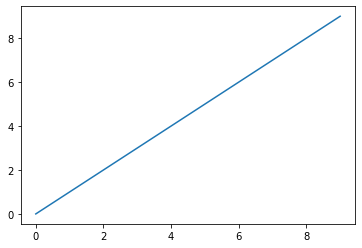

In [393]:
plt.plot(np.arange(10))

## matplotlib

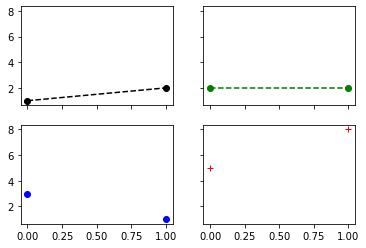

In [394]:
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 2,
                       sharex = True,
                       sharey = True)
ax[0,0].plot([1,2],'ko--')
ax[0,1].plot([2,2],'go--')
ax[1,0].plot([3,1],'bo')
ax[1,1].plot([5,8],'r+')

In [395]:
type(ax)

numpy.ndarray

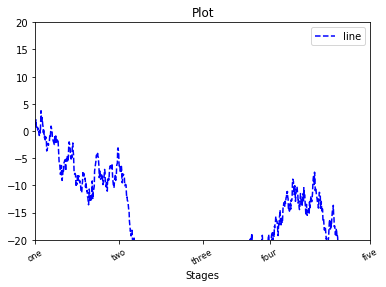

In [396]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(),
         'b--',
         label = 'line')

ax.legend(loc = 'best')

ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(['one','two','three','four','five'],
                     rotation = 30,
                     fontsize = 'small')
ax.set_xlim([10, 900])
ax.set_ylim([-20, 20])

ax.set_title('Cumsum plot')

ax.set_xlabel('Stages')

prop = {
    'title':'Plot',
    'xlabel':'Stages',
    'xticks':[0,250,500,700,1000],
    'xticklabels':['one','two','three','four','five']
}

ax.set(**prop)

plt.savefig('plot.png', dpi = 400)

## pandas methods

In [397]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                  columns = ['A','B','C','D'],
                  index = np.arange(0,100,10))
df

,A,B,C,D
0,-2.071510,0.329362,0.735103,1.045501
10,-1.754599,1.033227,2.198639,0.392622
20,-3.061927,0.758559,3.949956,1.756556
30,-4.952396,-0.351644,3.910079,0.846896
40,-5.333896,0.171799,4.315689,-0.465949
50,-5.999118,-0.981796,2.767451,-1.902174
60,-5.435251,-1.345678,2.417454,0.024179
70,-4.441564,-1.031086,2.832682,-1.654370
80,-5.923926,-1.295593,1.445268,-1.332369
90,-5.713965,-1.155044,2.047851,-0.082289


<AxesSubplot:>

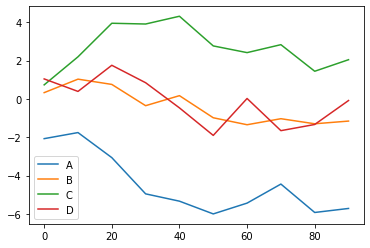

In [398]:
df.plot.line()

<AxesSubplot:>

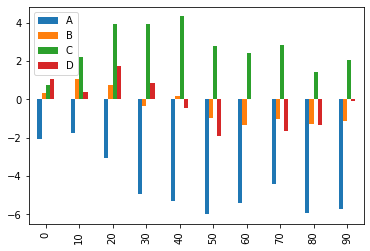

In [399]:
df.plot.bar()

<AxesSubplot:>

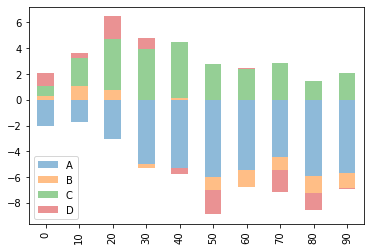

In [400]:
df.plot(kind = 'bar',
        stacked = True,
        alpha = 0.5)

In [401]:
df = pd.DataFrame({'A':np.random.normal(size = 1000)})
df

,A
0,1.024774
1,-1.146448
2,-0.733973
3,0.419495
4,-0.581496
...,...
995,-0.725311
996,-0.482909
997,0.245494
998,0.104778


<AxesSubplot:ylabel='Frequency'>

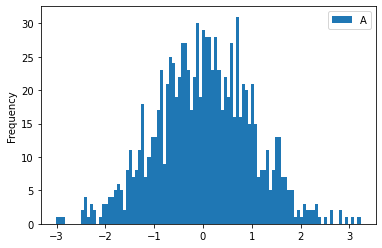

In [402]:
df.plot.hist(bins = 100)

<AxesSubplot:ylabel='Density'>

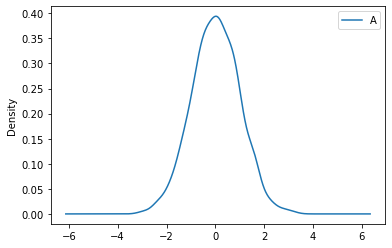

In [403]:
df.plot.density()

<AxesSubplot:ylabel='Density'>

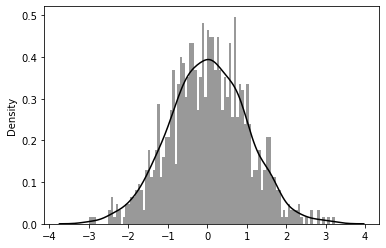

In [404]:
sns.distplot(df, bins = 100, color = 'k')

## seaborn

In [405]:
df = pd.DataFrame({'A':['one','two','three','four','five'] * 20,
                   'B':['Y','N'] * 50,
                   'C':np.random.random(100),
                   'D':np.random.randn(100)})
df

,A,B,C,D
0,one,Y,0.044783,0.109425
1,two,N,0.092813,1.386592
2,three,Y,0.827002,-2.663985
3,four,N,0.649604,-0.615428
4,five,Y,0.952805,0.658636
...,...,...,...,...
95,one,N,0.853694,1.299944
96,two,Y,0.405540,-0.972527
97,three,N,0.270921,-1.651521
98,four,Y,0.825642,-0.335358


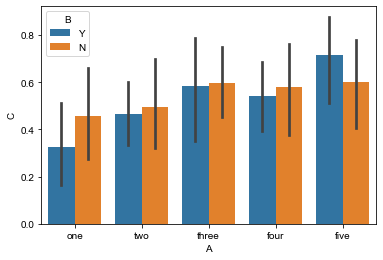

In [406]:
sns.barplot(data = df,
            x = 'A',
            y = 'C',
            hue = 'B')

sns.set(style = 'darkgrid')

In [407]:
df = pd.DataFrame({'A':np.random.normal(size = 1000),
                   'B':np.random.normal(size = 1000) * 2,
                   'C':np.random.normal(size = 1000) * 1.4 + 1,
                   'D':np.random.normal(size = 1000) /3 + 4,
                   'E':np.random.normal(size = 1000) ** 2})
df

,A,B,C,D,E
0,0.587583,-0.104505,1.185989,4.018240,0.005155
1,1.034614,-2.928729,-1.330419,3.842924,1.203275
2,-1.192345,0.421618,2.476812,3.432583,0.164189
3,0.862857,0.791386,0.909886,4.351491,3.969763
4,-0.762135,2.105011,2.747430,3.970258,2.583553
...,...,...,...,...,...
995,0.971165,2.512057,2.616693,4.156828,0.010704
996,0.382356,-0.092989,0.839956,3.494948,0.029411
997,-0.852828,4.489198,-1.482848,4.131926,2.783549
998,-1.650266,0.725606,1.124275,3.727681,0.057062


<AxesSubplot:xlabel='A', ylabel='B'>

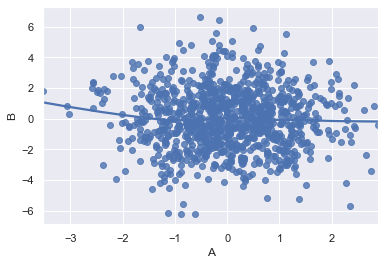

In [408]:
sns.regplot(data = df, x = 'A', y = 'B', lowess = True)

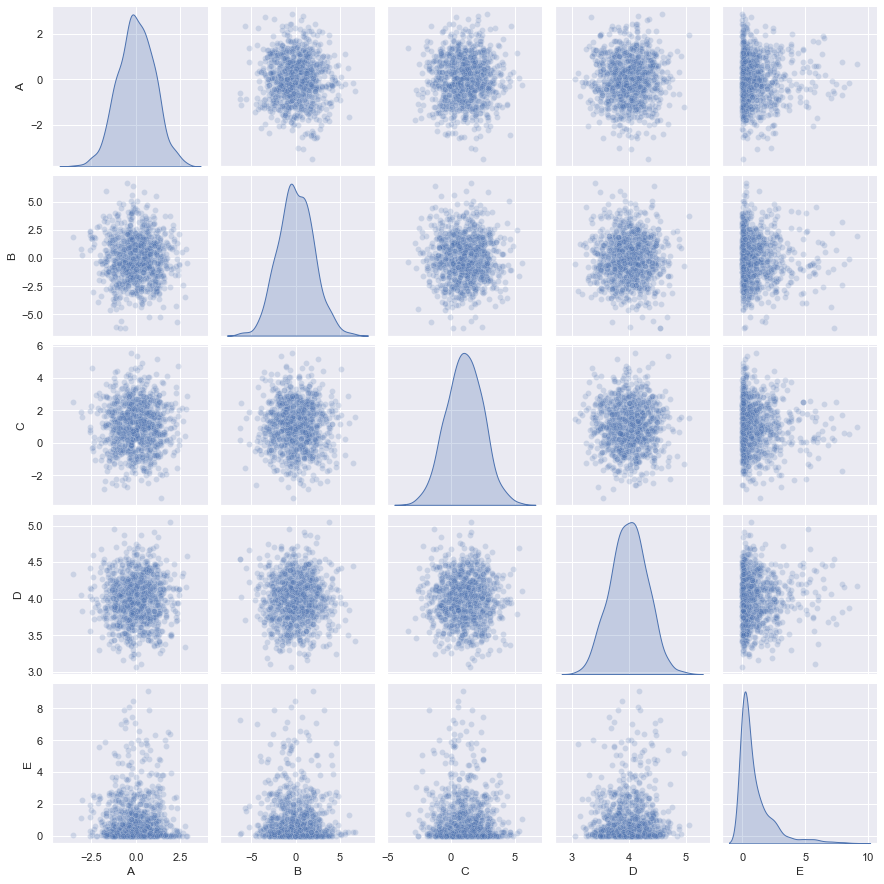

In [409]:
sns.pairplot(data = df, diag_kind = 'kde', plot_kws = {'alpha':0.2})

In [410]:
df = pd.DataFrame({'A':['Yes','No'] * 350,
                   'B':['Mon','Tue','Wed','Thu','Fri','Sat','Sun'] * 100,
                   'C':['Big','Small'] * 350,
                   'D':np.random.normal(size = 700)})
df

,A,B,C,D
0,Yes,Mon,Big,-0.285794
1,No,Tue,Small,-0.699758
2,Yes,Wed,Big,-1.022154
3,No,Thu,Small,-0.263242
4,Yes,Fri,Big,2.530372
...,...,...,...,...
695,No,Wed,Small,2.602089
696,Yes,Thu,Big,-0.574868
697,No,Fri,Small,0.768532
698,Yes,Sat,Big,-1.386624


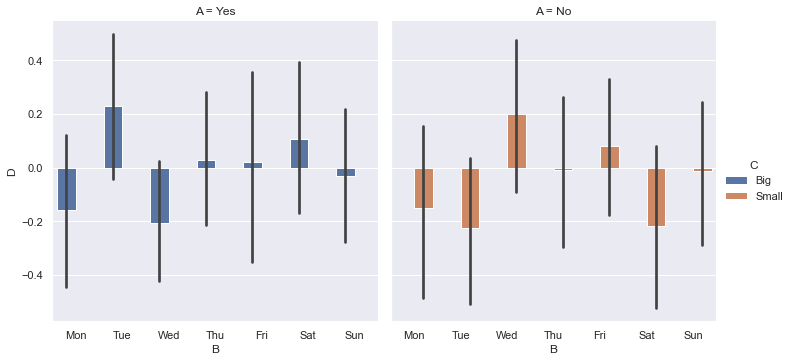

In [411]:
sns.catplot(data = df, x = 'B', y = 'D', hue = 'C', col = 'A', kind = 'bar')

# 15. Modeling

## pandas

In [412]:
df = pd.DataFrame({'x0':[1,2,3,4,5],
                   'x1':[0.01,-0.01,0.25,-4.1,0],
                   'y':[-1.5,0,3.6,1.3,-2],
                   'category':['a','b','a','a','b']})
df

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [413]:
df.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'a'],
       [4, -4.1, 1.3, 'a'],
       [5, 0.0, -2.0, 'b']], dtype=object)

In [414]:
type(df.values)

numpy.ndarray

In [415]:
df.loc[:,['x0','x1']].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [416]:
df['category'] = pd.Categorical(values = ['a','b','a','a','b'],
                                categories = ['a','b'])
df

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [417]:
dummies = pd.get_dummies(df.category, prefix = 'category')
df = df.drop('category', axis = 1).join(dummies)
df

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


## Patsy

In [418]:
import patsy

In [419]:
df

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


In [420]:
y, X = patsy.dmatrices('y ~ x0 + x1', data = df)

In [421]:
y, X

(DesignMatrix with shape (5, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   Terms:
     'y' (column 0),
 DesignMatrix with shape (5, 3)
   Intercept  x0     x1
           1   1   0.01
           1   2  -0.01
           1   3   0.25
           1   4  -4.10
           1   5   0.00
   Terms:
     'Intercept' (column 0)
     'x0' (column 1)
     'x1' (column 2))

In [422]:
np.asarray(y), np.asarray(X)

(array([[-1.5],
        [ 0. ],
        [ 3.6],
        [ 1.3],
        [-2. ]]),
 array([[ 1.  ,  1.  ,  0.01],
        [ 1.  ,  2.  , -0.01],
        [ 1.  ,  3.  ,  0.25],
        [ 1.  ,  4.  , -4.1 ],
        [ 1.  ,  5.  ,  0.  ]]))

In [423]:
np.linalg.lstsq(X, y, rcond = None)

(array([[ 0.31290976],
        [-0.07910564],
        [-0.26546384]]),
 array([19.63791494]),
 3,
 array([8.03737688, 3.38335321, 0.90895207]))

In [424]:
y, X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1) + 1)', df)
y, X

(DesignMatrix with shape (5, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   Terms:
     'y' (column 0),
 DesignMatrix with shape (5, 3)
   Intercept  x0  np.log(np.abs(x1) + 1)
           1   1                 0.00995
           1   2                 0.00995
           1   3                 0.22314
           1   4                 1.62924
           1   5                 0.00000
   Terms:
     'Intercept' (column 0)
     'x0' (column 1)
     'np.log(np.abs(x1) + 1)' (column 2))

In [425]:
y, X = patsy.dmatrices('y ~ standardize(x0) + center(x1)', df)
y, X

(DesignMatrix with shape (5, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   Terms:
     'y' (column 0),
 DesignMatrix with shape (5, 3)
   Intercept  standardize(x0)  center(x1)
           1         -1.41421        0.78
           1         -0.70711        0.76
           1          0.00000        1.02
           1          0.70711       -3.33
           1          1.41421        0.77
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2))

## statsmodels

In [426]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [427]:
sm.OLS(df['y'], df[['x0','x1']]).fit().summary()

/Users/boyuan.li/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):             -0.573
Method:                 Least Squares   F-statistic:                            0.08931
Date:                Sun, 21 Nov 2021   Prob (F-statistic):                       0.917
Time:                        17:11:01   Log-Likelihood:                         -10.526
No. Observations:                   5   AIC:                                      25.05
Df Residuals:                       3   BIC:                                      24.27
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             0.0093      0.403      0.023      0.983      -1.274       1.292
x1            -0.2549      0.728     -0.350      0.749      -2.571       2.061
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.642
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.649
Skew:                           0.838   Prob(JB):                        0.723
Kurtosis:                       2.442   Cond. No.                         2.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [428]:
sm.OLS(df['y'], df[['x0','x1']]).fit().predict([1,2])

array([-0.50045418])

In [429]:
smf.ols('y ~ x0 + x1', data = df).fit().summary()

/Users/boyuan.li/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.915
Method:                 Least Squares   F-statistic:                   0.04431
Date:                Sun, 21 Nov 2021   Prob (F-statistic):              0.958
Time:                        17:11:01   Log-Likelihood:                -10.515
No. Observations:                   5   AIC:                             27.03
Df Residuals:                       2   BIC:                             25.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3129      3.313      0.094      0.933     -13.940      14.566
x0            -0.0791      1.057     -0.075      0.947      -4.628       4.470
x1            -0.2655      0.896     -0.296      0.795      -4.122       3.592
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.653
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.702
Skew:                           0.875   Prob(JB):                        0.704
Kurtosis:                       2.447   Cond. No.                         8.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [430]:
sm.tsa.AR(np.random.randn(100)).fit(MAXLAGS = 5).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                         AR(12)   Log Likelihood                -108.151
Method:                          cmle   S.D. of innovations              0.827
Date:                Sun, 21 Nov 2021   AIC                             -0.062
Time:                        17:11:01   BIC                              0.332
Sample:                             0   HQIC                             0.097
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1347      0.103      1.312      0.190      -0.067       0.336
L1.y           0.1284      0.115      1.119      0.263      -0.097       0.353
L2.y          -0.1040      0.114     -0.916      0.360      -0.327       0.119
L3.y          -0.0780      0.115     -0.678      0.498      -0.304       0.148
L4.y           0.1154      0.115      1.007      0.314      -0.109       0.340
L5.y          -0.0704      0.115     -0.611      0.541      -0.296       0.155
L6.y          -0.1312      0.114     -1.147      0.252      -0.355       0.093
L7.y          -0.1066      0.114     -0.932      0.351      -0.331       0.117
L8.y          -0.0491      0.115     -0.427      0.670      -0.275       0.176
L9.y          -0.0770      0.114     -0.673      0.501      -0.301       0.147
L10.y         -0.0776      0.115     -0.677      0.498      -0.302       0.147
L11.y         -0.1171      0.113     -1.032      0.302      -0.340       0.105
L12.y         -0.0792      0.114     -0.696      0.486      -0.302       0.144
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0170           -0.3680j            1.0816           -0.0553
AR.2             1.0170           +0.3680j            1.0816            0.0553
AR.3             0.7958           -0.9021j            1.2030           -0.1349
AR.4             0.7958           +0.9021j            1.2030            0.1349
AR.5             0.1750           -1.1284j            1.1419           -0.2255
AR.6             0.1750           +1.1284j            1.1419            0.2255
AR.7            -0.3539           -1.2454j            1.2947           -0.2941
AR.8            -0.3539           +1.2454j            1.2947            0.2941
AR.9            -1.0080           -0.8736j            1.3339           -0.3863
AR.10           -1.0080           +0.8736j            1.3339            0.3863
AR.11           -1.3656           -0.2321j            1.3852           -0.4732
AR.12           -1.3656           +0.2321j            1.3852            0.4732
------------------------------------------------------------------------------
"""

## sklearn

In [431]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [432]:
%%script echo skipping
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_
model.predict()

scores = cross_val_score(model, X_train, y_train, cv = 5)

skipping
